L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

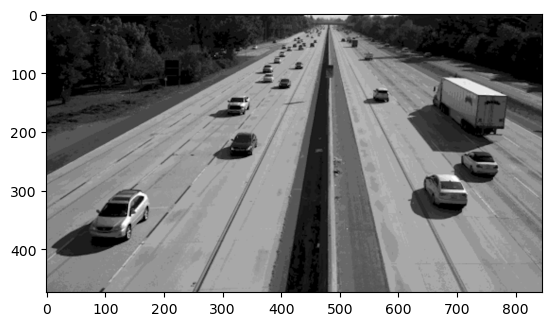

In [364]:
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

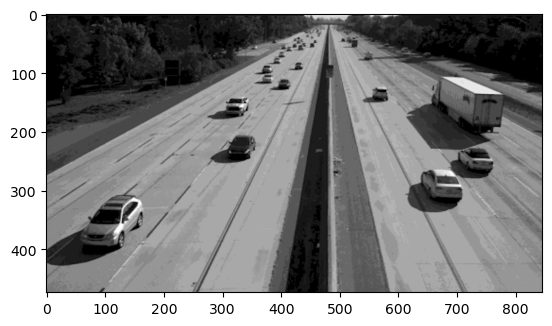

In [322]:
img2=cv.imread('frame2.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

In [365]:
corner1=cv.goodFeaturesToTrack(img1,maxCorners=1000, qualityLevel=0.01, minDistance=1)
corner2=cv.goodFeaturesToTrack(img2,1000,0.01,10)
corner1=corner1.astype(int)
corner1=corner1.reshape((len(corner1), 2))
corner2=corner2.astype(int)
corner2=corner2.reshape((len(corner2), 2))

In [332]:
len(img1[0])

846

In [ ]:
corner1=list(corner1)
temp=[]
for point in corner1:
    x, y = point
    if img1.shape[0]<x or img1.shape[1]<y:
        temp.append(point)
corner1=np.array(temp)

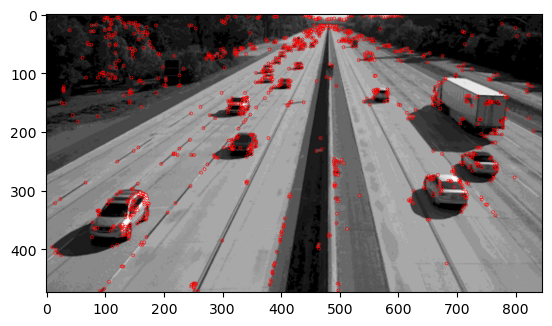

In [362]:
img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
for i in corner1: cv.circle(img1,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img1,cmap='gray')

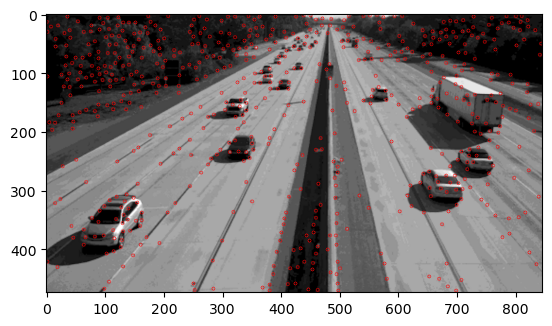

In [18]:
img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
for i in corner2: cv.circle(img2,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img2,cmap='gray')

In [10]:
flow=cv.calcOpticalFlowFarneback(img1,img2,corner1, 0.5, 3, 15, 5, 7, 1.5, 0)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\video\src\optflowgf.cpp:1116: error: (-215:Assertion failed) prev0.size() == next0.size() && prev0.channels() == next0.channels() && prev0.channels() == 1 && pyrScale_ < 1 in function 'cv::`anonymous-namespace'::FarnebackOpticalFlowImpl::calc'


In [166]:
u=np.array([i[0] for i in flow])
v=np.array([i[1] for i in flow])

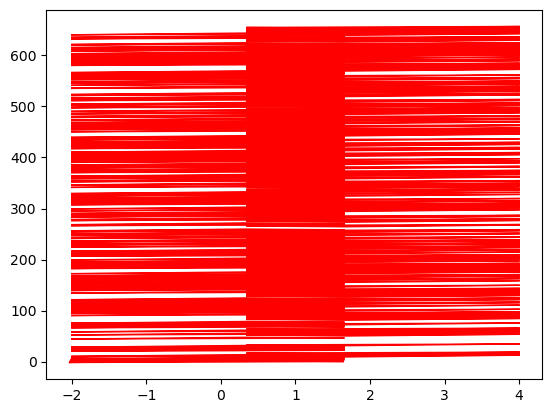

In [167]:
S=np.shape(corner1)
for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>1e-16 or abs(v[i,j])>1e-16:
                plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")

# Ma methode

In [352]:
gradienx=cv.Sobel(img1,cv.CV_64F,1,0,ksize=5)
gradieny=cv.Sobel(img1,cv.CV_64F,0,1,ksize=5)
img1[400,800]

150

In [366]:
gradienx=cv.Sobel(img1,cv.CV_64F,1,0,ksize=5)
gradieny=cv.Sobel(img1,cv.CV_64F,0,1,ksize=5)
A=[]
b=[]
v={}
for i in corner1:
    A.append([gradienx[i[1],i[0]+1],gradieny[i[1],i[0]+1]])
    b.append((img1-img2)[i[1],i[0]+1])
    A.append([gradienx[i[1],i[0]-1],gradieny[i[1],i[0]-1]])
    b.append((img1-img2)[i[1],i[0]-1])
    A.append([gradienx[i[1]+1,i[0]],gradieny[i[1]+1,i[0]]])
    b.append((img1-img2)[i[1]+1,i[0]])
    A.append([gradienx[i[1]-1,i[0]],gradieny[i[1]-1,i[0]]])
    b.append((img1-img2)[i[1]-1,i[0]])
    A=np.array(A)
    b=np.array(b)
    v[tuple(i)]=np.linalg.inv(A.T@A)@A.T@b
    b=[]
    A=[]

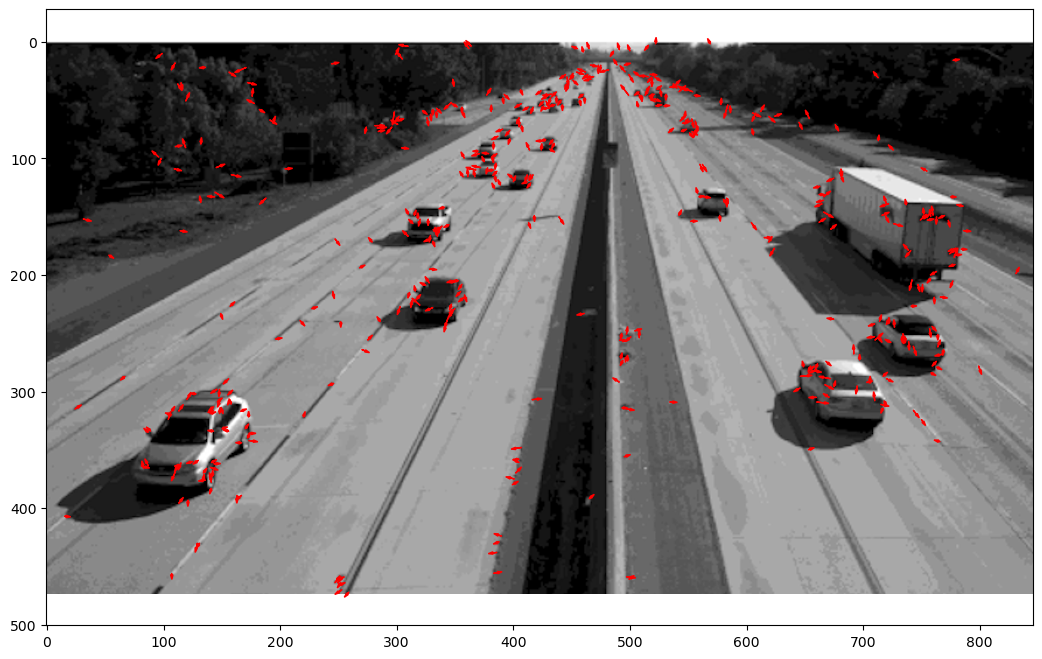

In [379]:
plt.figure(figsize=(16,8))
img1=cv.imread('frame1.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')
for i in v.keys():
     if abs(v[i][0])>0.05 or abs(v[i][1])>0.05:
        plt.arrow(i[0],i[1],20*v[i][1],20*v[i][0], head_width = 2, head_length = 4, color = "r")
plt.show()